# **Course: Big Data CBD 2214**

# **Assignment 2: `Twitter(X) Disaster Classification` -Group 1**


## **Submitted by:**

---

> * Chirag Bansal (C0908045)

> * Sahibpreet Singh (C0928040)

> * Balpreet Singh (C0924974)

> * Suril Purohit (C0928435)

# Business Case Evaluation
## Business Case Evaluation for Twitter(X) Disaster Classification

**Business Case Creation**
* **Justification and Motivation**

    - The main motivation which helps us to choose this problem is to help the agencies , organizations or individuals who are responsible for monitering twitter to identify the tweets efficently.
    - It also help government bodies, and other Rapid response bodies to improving response time during emergencies, enhancing situational awareness, or safeguarding reputation.

* **Goals of the Analysis**
    * Predict and identify the genuine disaster tweets while minimize the false positive and maximize the True Positive identification.

    * Achive a good accuracy rate and reduce responce time to relative tweets.

# Data Identification for Twitter(X) Disaster Classification
### Using Dataset from Kaggle  Competition: "Natural Language Processing with Disaster Tweets ('https://www.kaggle.com/competitions/nlp-getting-started')

* For our this assignment, we use the dataset for a compitition (Natural Language Processing with Disaster Tweets) which is available on Kaggle. This dataset contains a complete information about tweets like `keywords ` , `location`, `tweet text` . Using this dataset allows us to conduct various experiments to get a information how keywords, or text word's context affect the tweet's category.

# Data Acquisition and Filtering

* As we are using a kaggle compition dataset so, it is  a single dataset with two types of file (`train.csv`,`test.csv`) which contains initially only  `5 columns` and `7613 rows` for `train` and `4 columns` and `3263 rows` for `test`.

### Importing all Libraries

In [1]:
# Importing all the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import numpy as np
import string
from nltk import ngrams
from collections import defaultdict

# This Class is defined to clean the data and preprocess it and developed by the team
from main_function import X_clean

# To filter all the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Extraction

* Some of the data identified as input for the analysis may arrive in a format incompatible. Data Extraction lifecycle stage, is dedicated to extracting disparate data and transforming it into a format that the underlying Big Data solution.

***But in our case we are using a CSV files only which doesn't have any compatibilty issue, so we doesn't required `data extraction` in this assignment.*** b

### Dataset importing

In [2]:
# Here we are using python's dataframe library Pandas to read the giver CSV file to perform oprations
# pd.read_csv function is used to read it where pd is pandas library and read_csv is function

# Reading the train and test data from csv files into DataFrames
tweets = pd.read_csv("dataset/train.csv")
tweets_test = pd.read_csv("dataset/test.csv")

In [3]:
# Display the number of rows and columns in the both the files
print(f"""There are {tweets.shape[0]} rows and {tweets.shape[1]} columns in our Training Dataset.
There are {tweets_test.shape[0]} rows and {tweets_test.shape[1]} columns in our Test Dataset.""")

There are 7613 rows and 5 columns in our Training Dataset.
There are 3263 rows and 4 columns in our Test Dataset.


In [4]:
# using .head() function to display the first 5 rows of the dataset on our dataframe variable 'tweets'
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Using .info method to prints the information or summary of the dataframe
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
#  It shows the shape of the both dataset files
print(tweets.shape)
print(tweets_test.shape)

(7613, 5)
(3263, 4)


In [7]:
# Display all the columns of both dataset files
print(tweets.columns)
print(tweets_test.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Index(['id', 'keyword', 'location', 'text'], dtype='object')


#### * From above cell we can figure out that the `target` column is the column which we have to predict as it is available in train data but not present in test data.<br> So, we will save this column into another variable after a few cells.

In [8]:
# To Display the count of unique values in each column of both dataset we are using the for loop.
# We are using the .unique() function to get the unique values of the column in the dataset
for df in [tweets, tweets_test]:
    if df.equals(tweets):
        print("Train Dataset")
    else:
        print("Test Dataset ")
    for col in df.columns:
        print(f"{col} : {df[col].nunique()} unique values")
    print("\n")

Train Dataset
id : 7613 unique values
keyword : 221 unique values
location : 3341 unique values
text : 7503 unique values
target : 2 unique values


Test Dataset 
id : 3263 unique values
keyword : 221 unique values
location : 1602 unique values
text : 3243 unique values




In [9]:
# check null values in train dataframe
tweets.isnull().values.any()

True

In [10]:
# check null values in test dataframe
tweets_test.isnull().values.any()

True

In [11]:
# It shows the sum of all null values in each column of training dataset
tweets.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
# It shows the sum of all null values in each column of testing dataset
tweets_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

##### Dropping the `id` column from the dataset

In [13]:
#  Dropping the id column form both dataset files, because it is just a serial number 
# so it doesn't provide any valuable information
tweets.drop(columns=['id'],inplace=True)
tweets_test.drop(columns=['id'],inplace=True)

#printing the shape of dataframes
print(tweets.shape)
print(tweets_test.shape)

(7613, 4)
(3263, 3)


In [14]:
# Display's an int representing the number of elements in dataframe
print(tweets.size, end="\n")

# Display's an int representing the number of elements in dataframe
print(tweets_test.size)

30452
9789


# DATA AGGREGATION AND REPRESENTATION

* Data may be spread across multiple datasets, requiring that datasets be joined together via common fields. But in our case we don't need Data aggregation but we need to convert our categorical data into numarical data and will normalize our data in next steps i.e Data Analysis and Data Visulization

# DATA ANALYSIS and DATA VISUALIZATION

* Here we are combining Data analysis and visualization together, Firstly, these both are related to each other and secondly we are not able to analysis our data upto proper potential without doing Visualization along the side to analyzation.

##### For Visulization we are going to use different types for graph for which we are using diffrent libraries like
   * Matplotlib
   * Plotly
   * Seaborn

## Target variable exploration
***target***  from training is our target column

In [15]:
#As we are working on Classification problem so it has only 2 unique values
len(tweets['target'].unique())

2

In [16]:
#target variable
tweets_target = tweets['target'] # Using tweets_target to seprating the target variable form the independent variables

### Exploratory data analysis

`Vizulization`

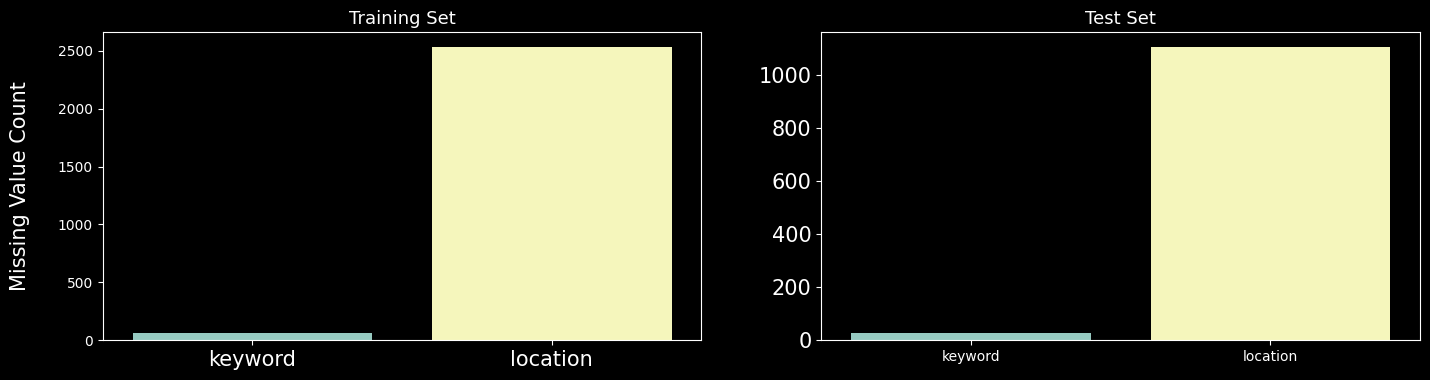

In [17]:
# Visualizing the Nan values which are present in the dataset
nan_values = ["keyword", "location"]

# Define a figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

# Using Seaborn to plot a bargraph for the missing values in the dataset
sns.barplot(x=tweets[nan_values].isnull().sum().index, y=tweets[nan_values].isnull().sum().values, ax=axes[0])
sns.barplot(x=tweets_test[nan_values].isnull().sum().index, y=tweets_test[nan_values].isnull().sum().values, ax=axes[1])

# Setting the labels and title for the plot
axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

From this bar chart we get an idea how much values are null in each column ['keyword','location'] in both the files. 

In [18]:
# So to fill the missing values in the dataset we are using the fillna() function from pandas library.
# We are filling the missing values with the string 'nokeyword' and 'nolocation' in the dataset
# As we are working on text data, we have some medhots to handle missing data
# - 1) Fill the missing values with the most frequent value in the column
# - 2) Fill the missing values with the mean value of the column

# But this may increase the noise in the data, so we are filling the missing values with the string 'nokeyword' and 'nolocation'

for df in [tweets, tweets_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no{col}')


In [19]:
tweets.isna().sum()

keyword     0
location    0
text        0
target      0
dtype: int64

In [20]:
tweets_test.isna().sum()

keyword     0
location    0
text        0
dtype: int64

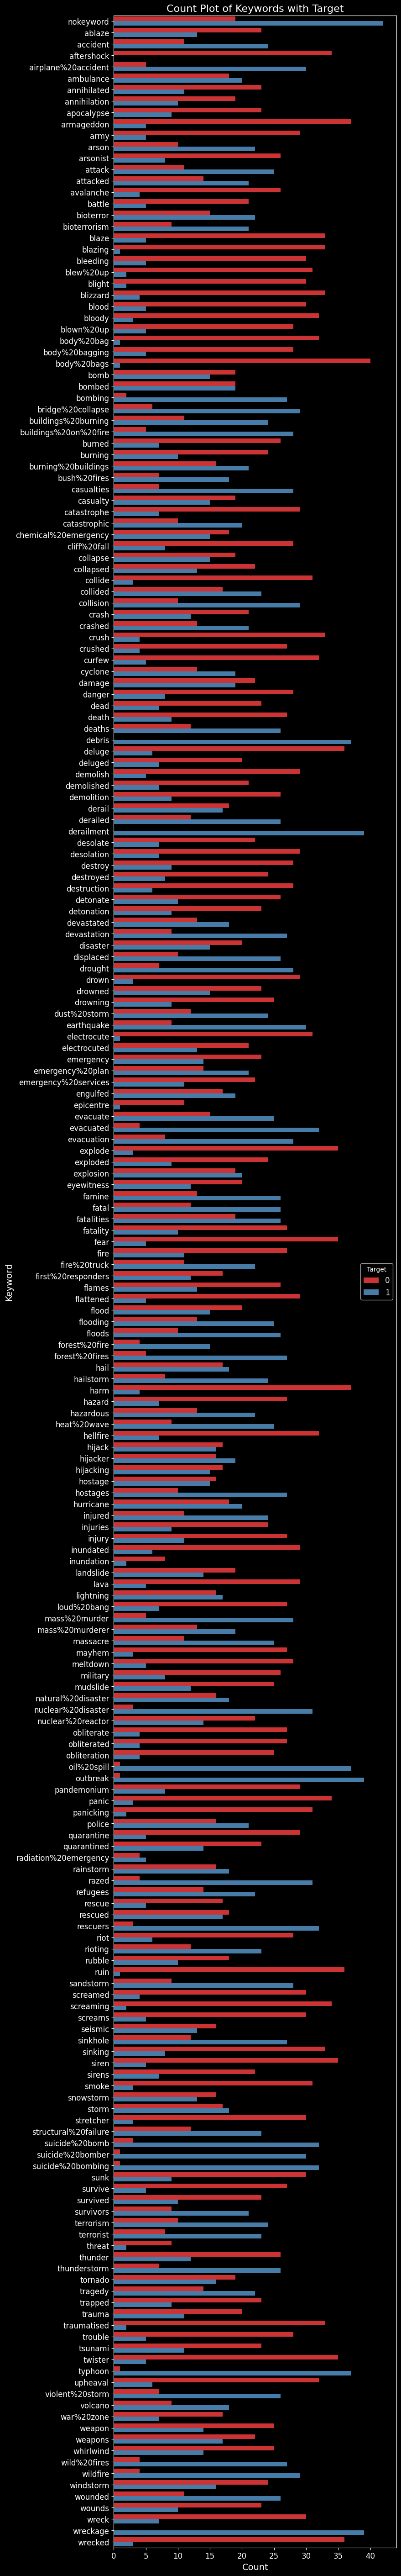

In [21]:
# count plot along y axis

# Define a figure size for plotting
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y ='keyword', hue = "target", data = tweets,palette = "Set1")

# Add title and labels
plt.title('Count Plot of Keywords with Target', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Keyword', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(title='Target', fontsize=12)

# Show the plot
plt.show()


In [22]:
# Now we are adding columns into our dataset to get more insights from the data
# We are adding Word Count columns to get the count of words in each tweet
# We are adding Unique Word Count columns to get the count of unique words in each tweet
# We are adding Stop Word Count columns to get the count of stop words in each tweet
# We are adding URL Count columns to get the count of URL's in each tweet
# We are adding Mean Word Length columns to get the mean word length in each tweet
# We are adding Char Count columns to get the count of characters in each tweet
# We are adding Punctuation Count columns to get the count of punctuation in each tweet
# We are adding Hashtag Count columns to get the count of hashtags in each tweet
# We are adding Mention Count columns to get the count of mentions in each tweet


# word_count
tweets['word_count'] = tweets['text'].apply(lambda x: len(str(x).split()))
tweets_test['word_count'] = tweets_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
tweets['unique_word_count'] = tweets['text'].apply(lambda x: len(set(str(x).split())))
tweets_test['unique_word_count'] = tweets_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
tweets['stop_word_count'] = tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
tweets_test['stop_word_count'] = tweets_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
tweets['url_count'] = tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
tweets_test['url_count'] = tweets_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
tweets['mean_word_length'] = tweets['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
tweets_test['mean_word_length'] = tweets_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
tweets['char_count'] = tweets['text'].apply(lambda x: len(str(x)))
tweets_test['char_count'] = tweets_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
tweets['punctuation_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
tweets_test['punctuation_count'] = tweets_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
tweets['hashtag_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
tweets_test['hashtag_count'] = tweets_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
tweets['mention_count'] = tweets['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
tweets_test['mention_count'] = tweets_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

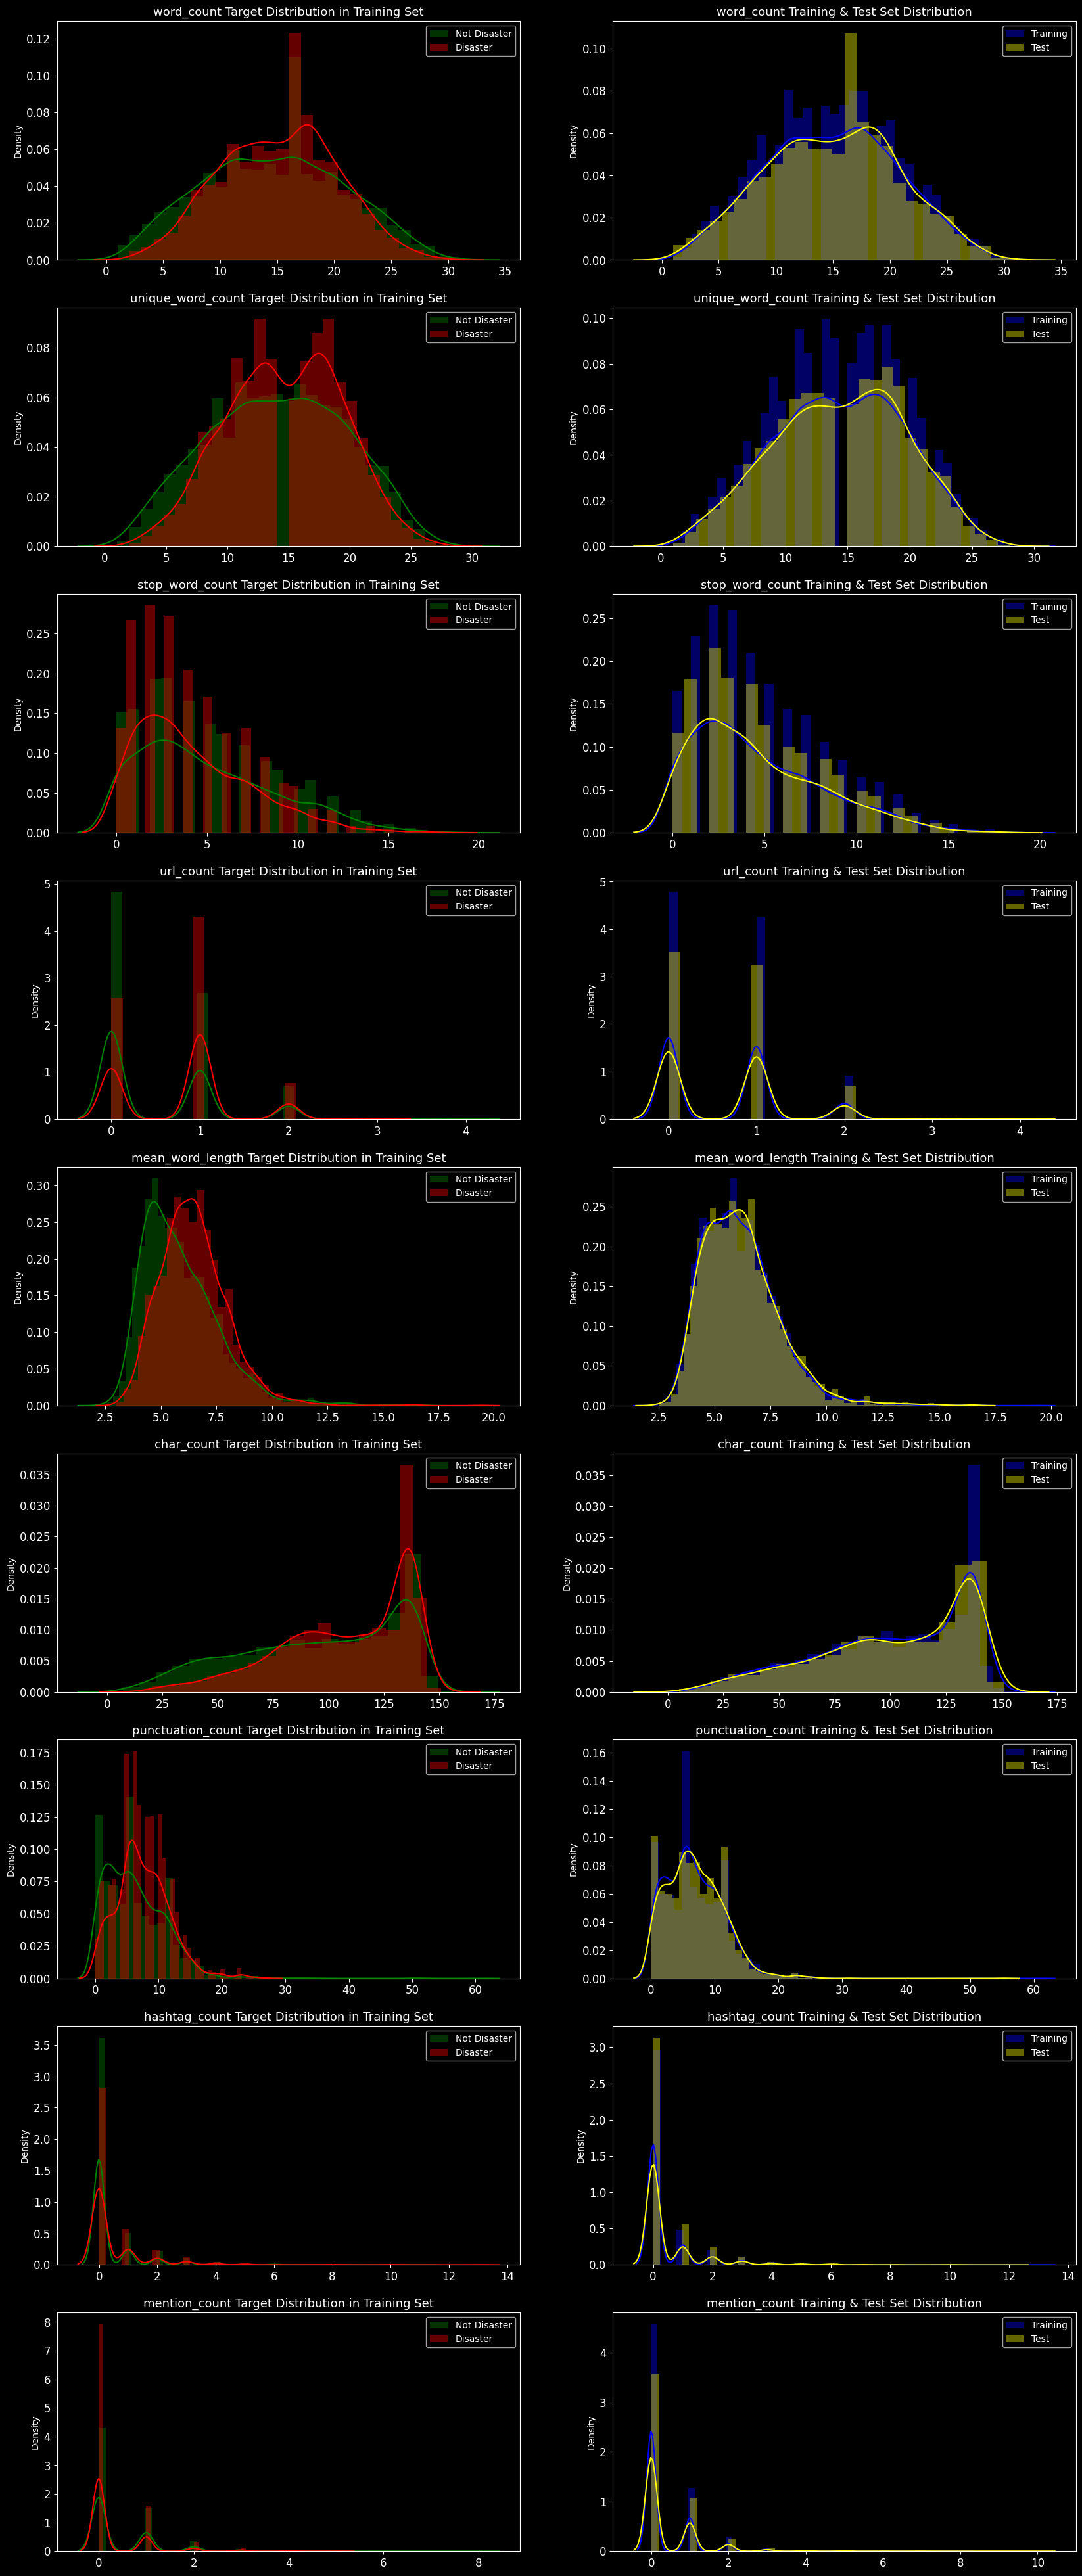

In [23]:
# Plotting the distribution of the new added columns

# Define the features to plot
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = tweets['target'] == 1

# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

# Plot the distribution of the features 
for i, feature in enumerate(METAFEATURES):
    sns.distplot(tweets.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(tweets.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(tweets[feature], label='Training', ax=axes[i][1],color='blue')
    sns.distplot(tweets_test[feature], label='Test', ax=axes[i][1],color='yellow')

    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()

    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [24]:
# Count of target variable values in the dataset
label_target_count=tweets.target.value_counts()

In [25]:
# Display the count of target variable values in the dataset
label_target_count

target
0    4342
1    3271
Name: count, dtype: int64

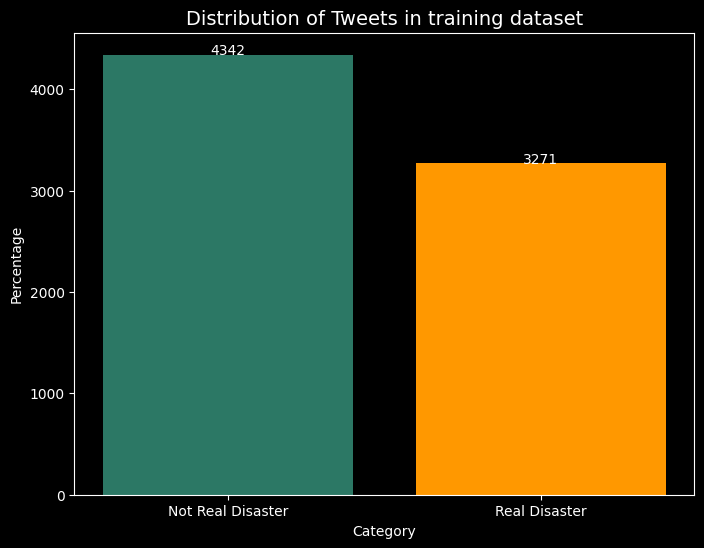

In [26]:
# Create a list of both the target labels with proper naming
target_label= ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Define the figure size for plotting
plt.figure(figsize=(8, 6))

# Plot the bar chart
plt.bar(target_label, label_target_count, color=colors)

# Add data labels
for i, v in enumerate(label_target_count):
    plt.text(i, v + 1, str(v), ha='center')

# Add title and labels
plt.title("Distribution of Tweets in training dataset", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Percentage")

# Show the plot
plt.show()


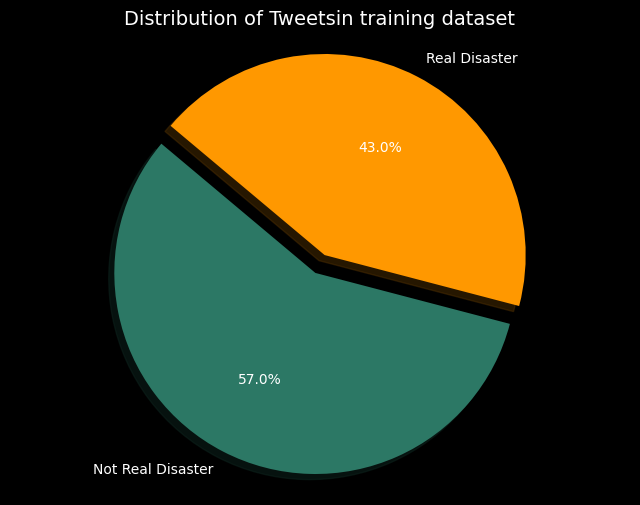

In [27]:
# Plot the distribution of the target variable in the dataset in the pie chart for a better ratio understanding

target_label = ["Not Real Disaster", "Real Disaster"]

# Customize the colors
colors = ['#2C7865','#FF9800']

# Explode the Real Disaster slice
explode = (0.1, 0)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_target_count, labels=target_label, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Add title
plt.title("Distribution of Tweetsin training dataset", fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

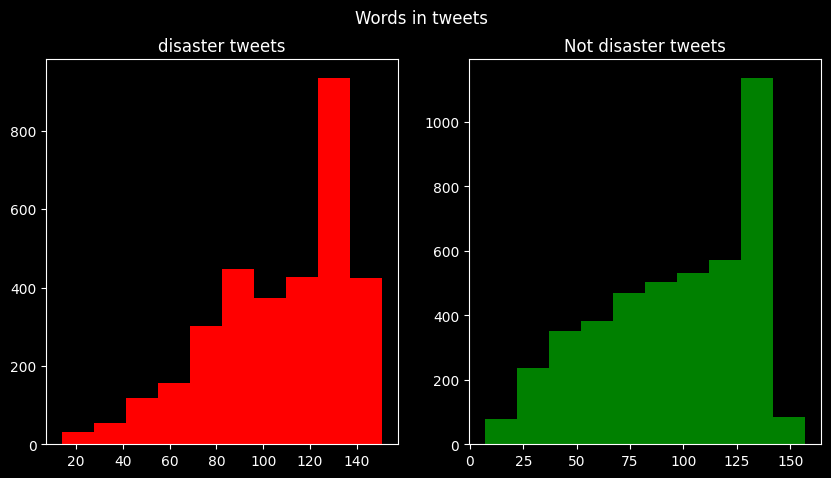

In [28]:
# Plot a histogram for the distribution of words in the tweets

# Define the figure size and axis for plotting
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# Plot the histogram
tweet_len=tweets[tweets['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweets[tweets['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()

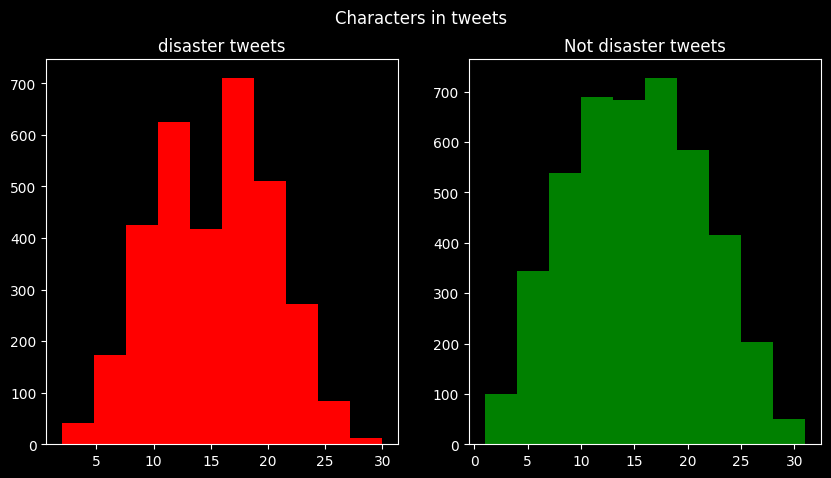

In [29]:
# Plot a histogram for the distribution of characters in the tweets

# Define the figure size and axis for plotting
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

# Plot the histogram
tweet_len=tweets[tweets['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweets[tweets['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

### N-Gram
- N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document. They come into play when we deal with text data in NLP (Natural Language Processing) tasks.

Example: <br>
![Image](n-gram.png)

refrence -
* https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/ 
* Image - https://images.app.goo.gl/M94dEyZvMzY9gTK26

In [30]:
#  Define a function for n-gram analysis
def gram(text,n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [31]:
# Initialize a specific number to plot the top 100 n-gram words
N = 100

# Unigrams

# defaultdict means that if a key is not found in the dictionary, then instead of a KeyError being thrown, a new entry is created
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        disaster_unigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

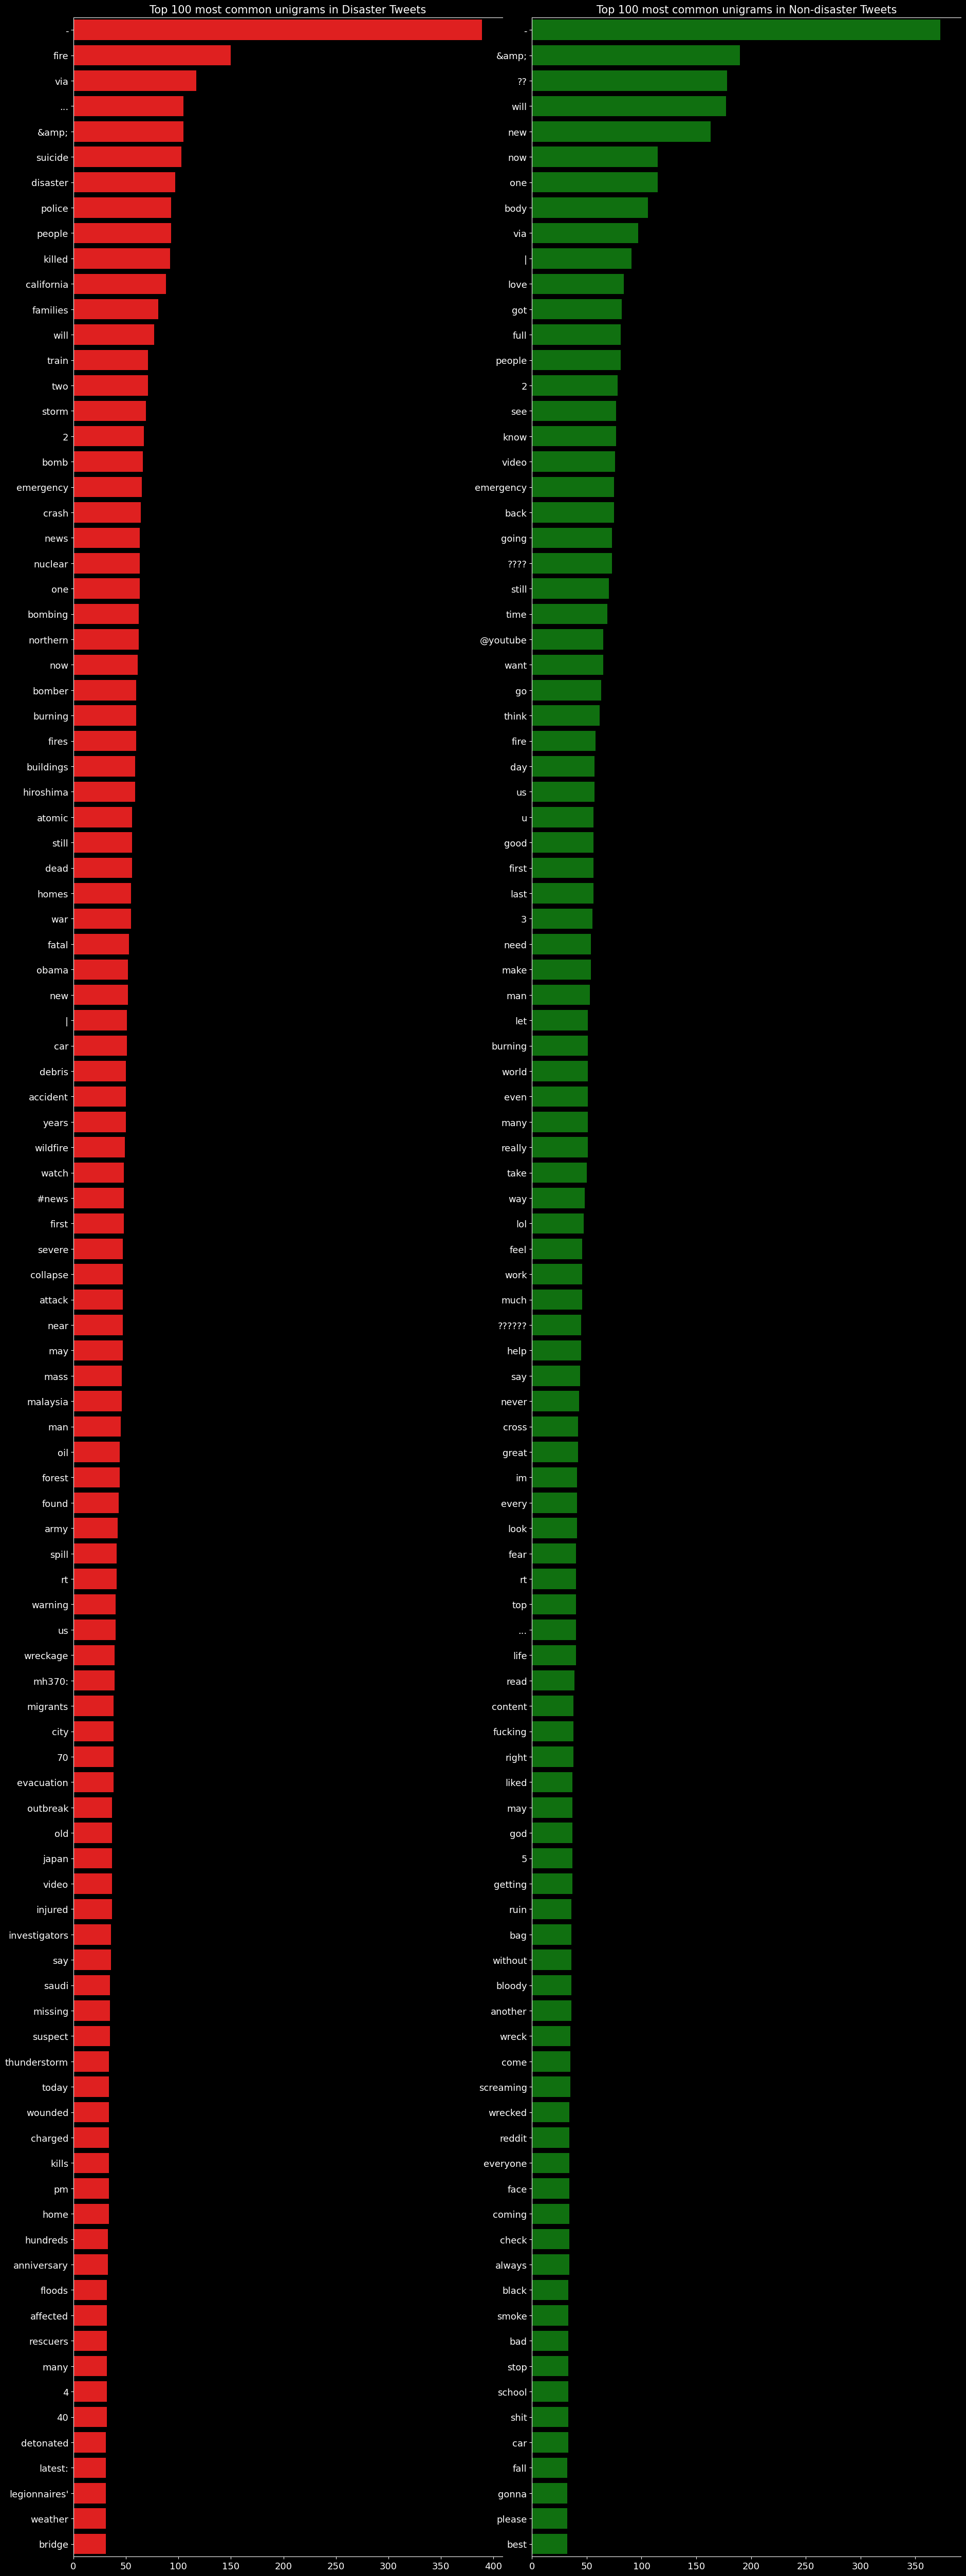

In [32]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common unigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [33]:
# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        disaster_bigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

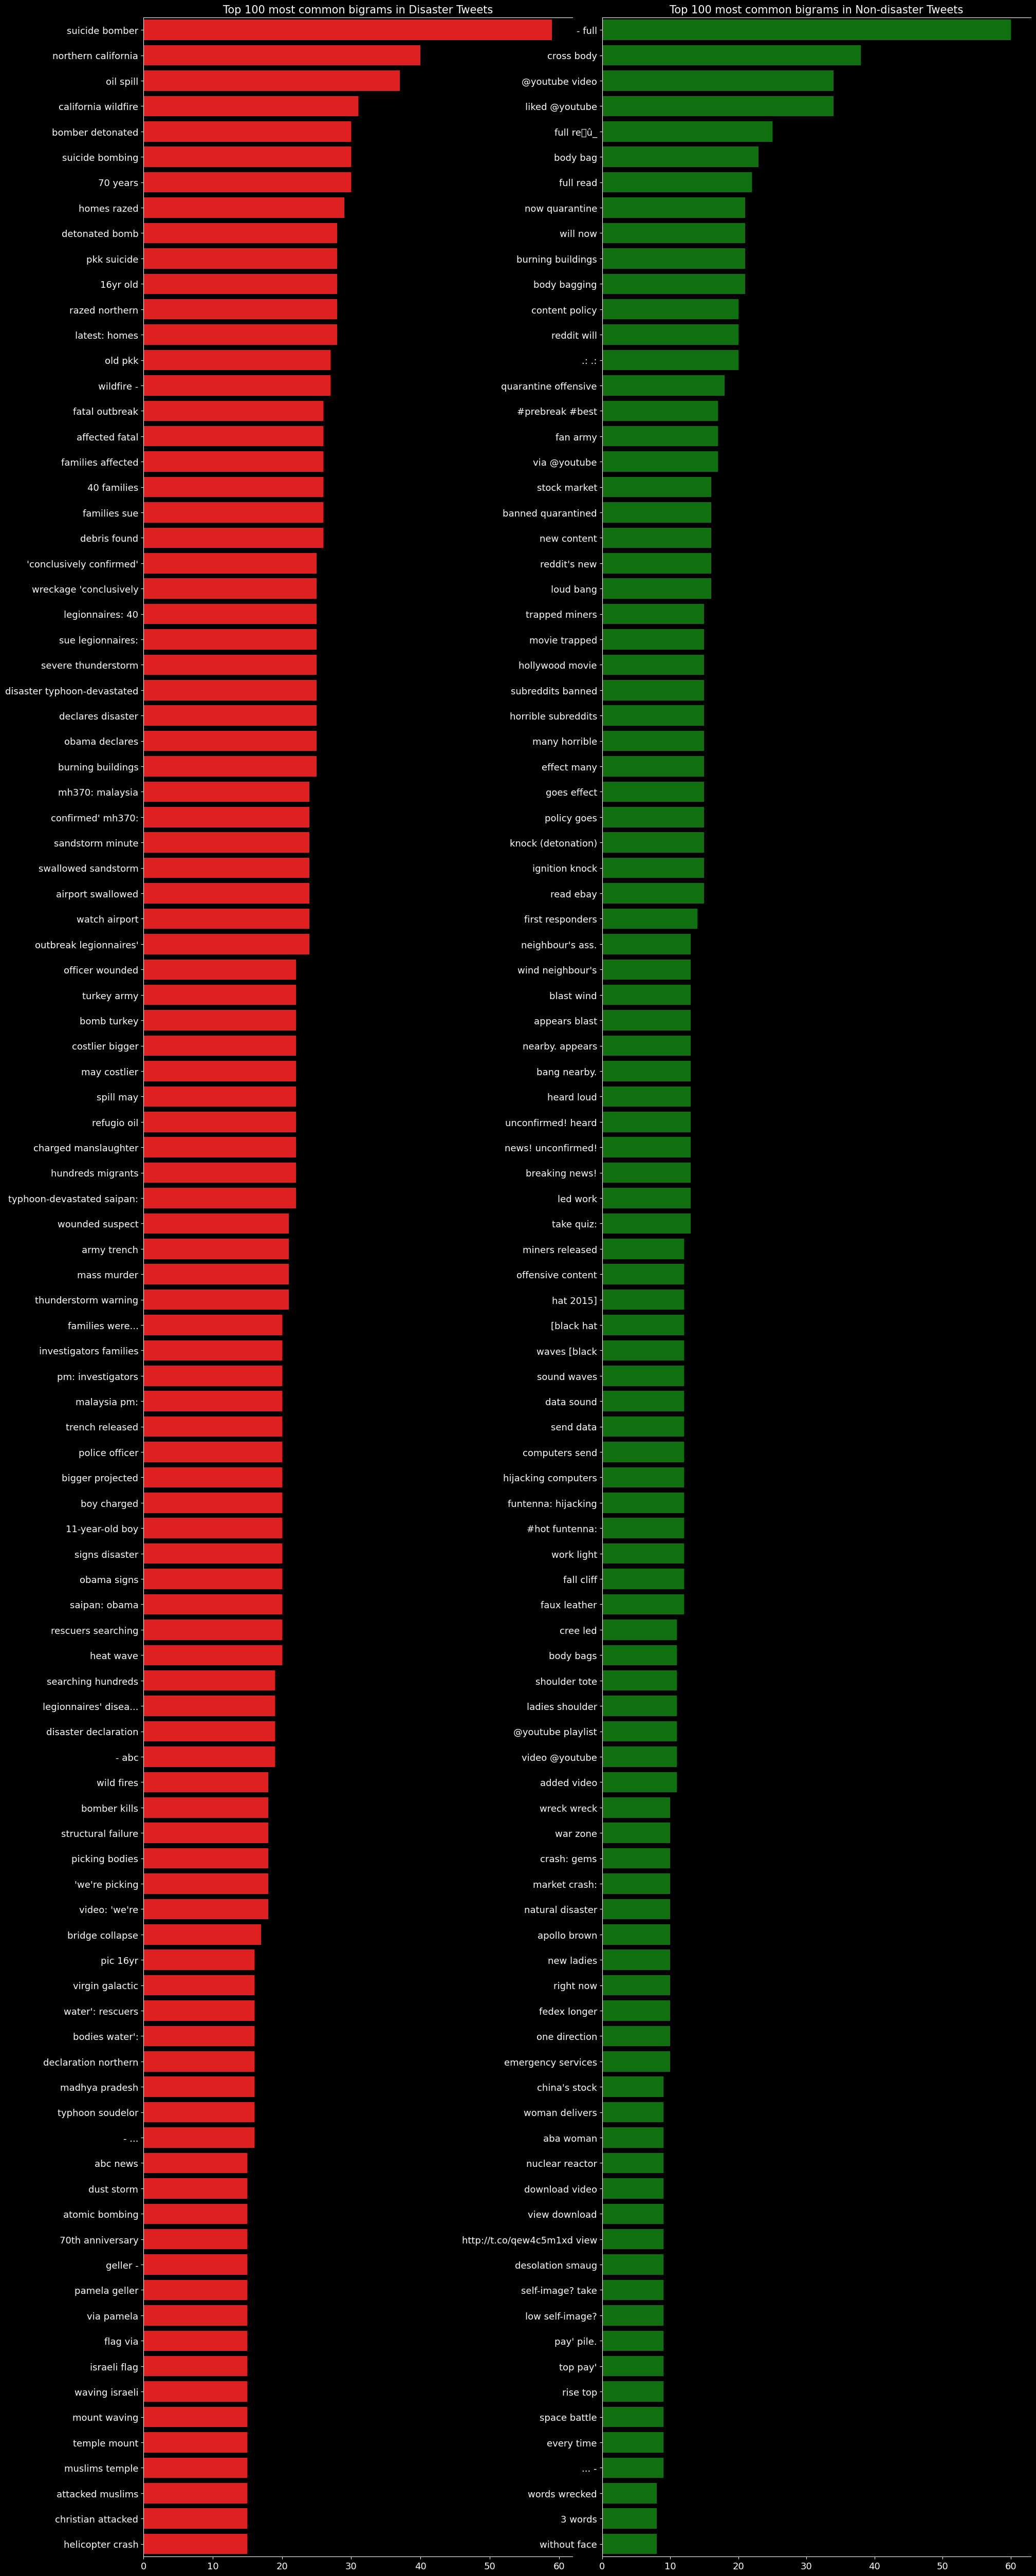

In [34]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common bigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [35]:
# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in tweets[DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        disaster_trigrams[word] += 1

for tweet in tweets[~DISASTER_TWEETS]['text']:
    for word in gram(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1

df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

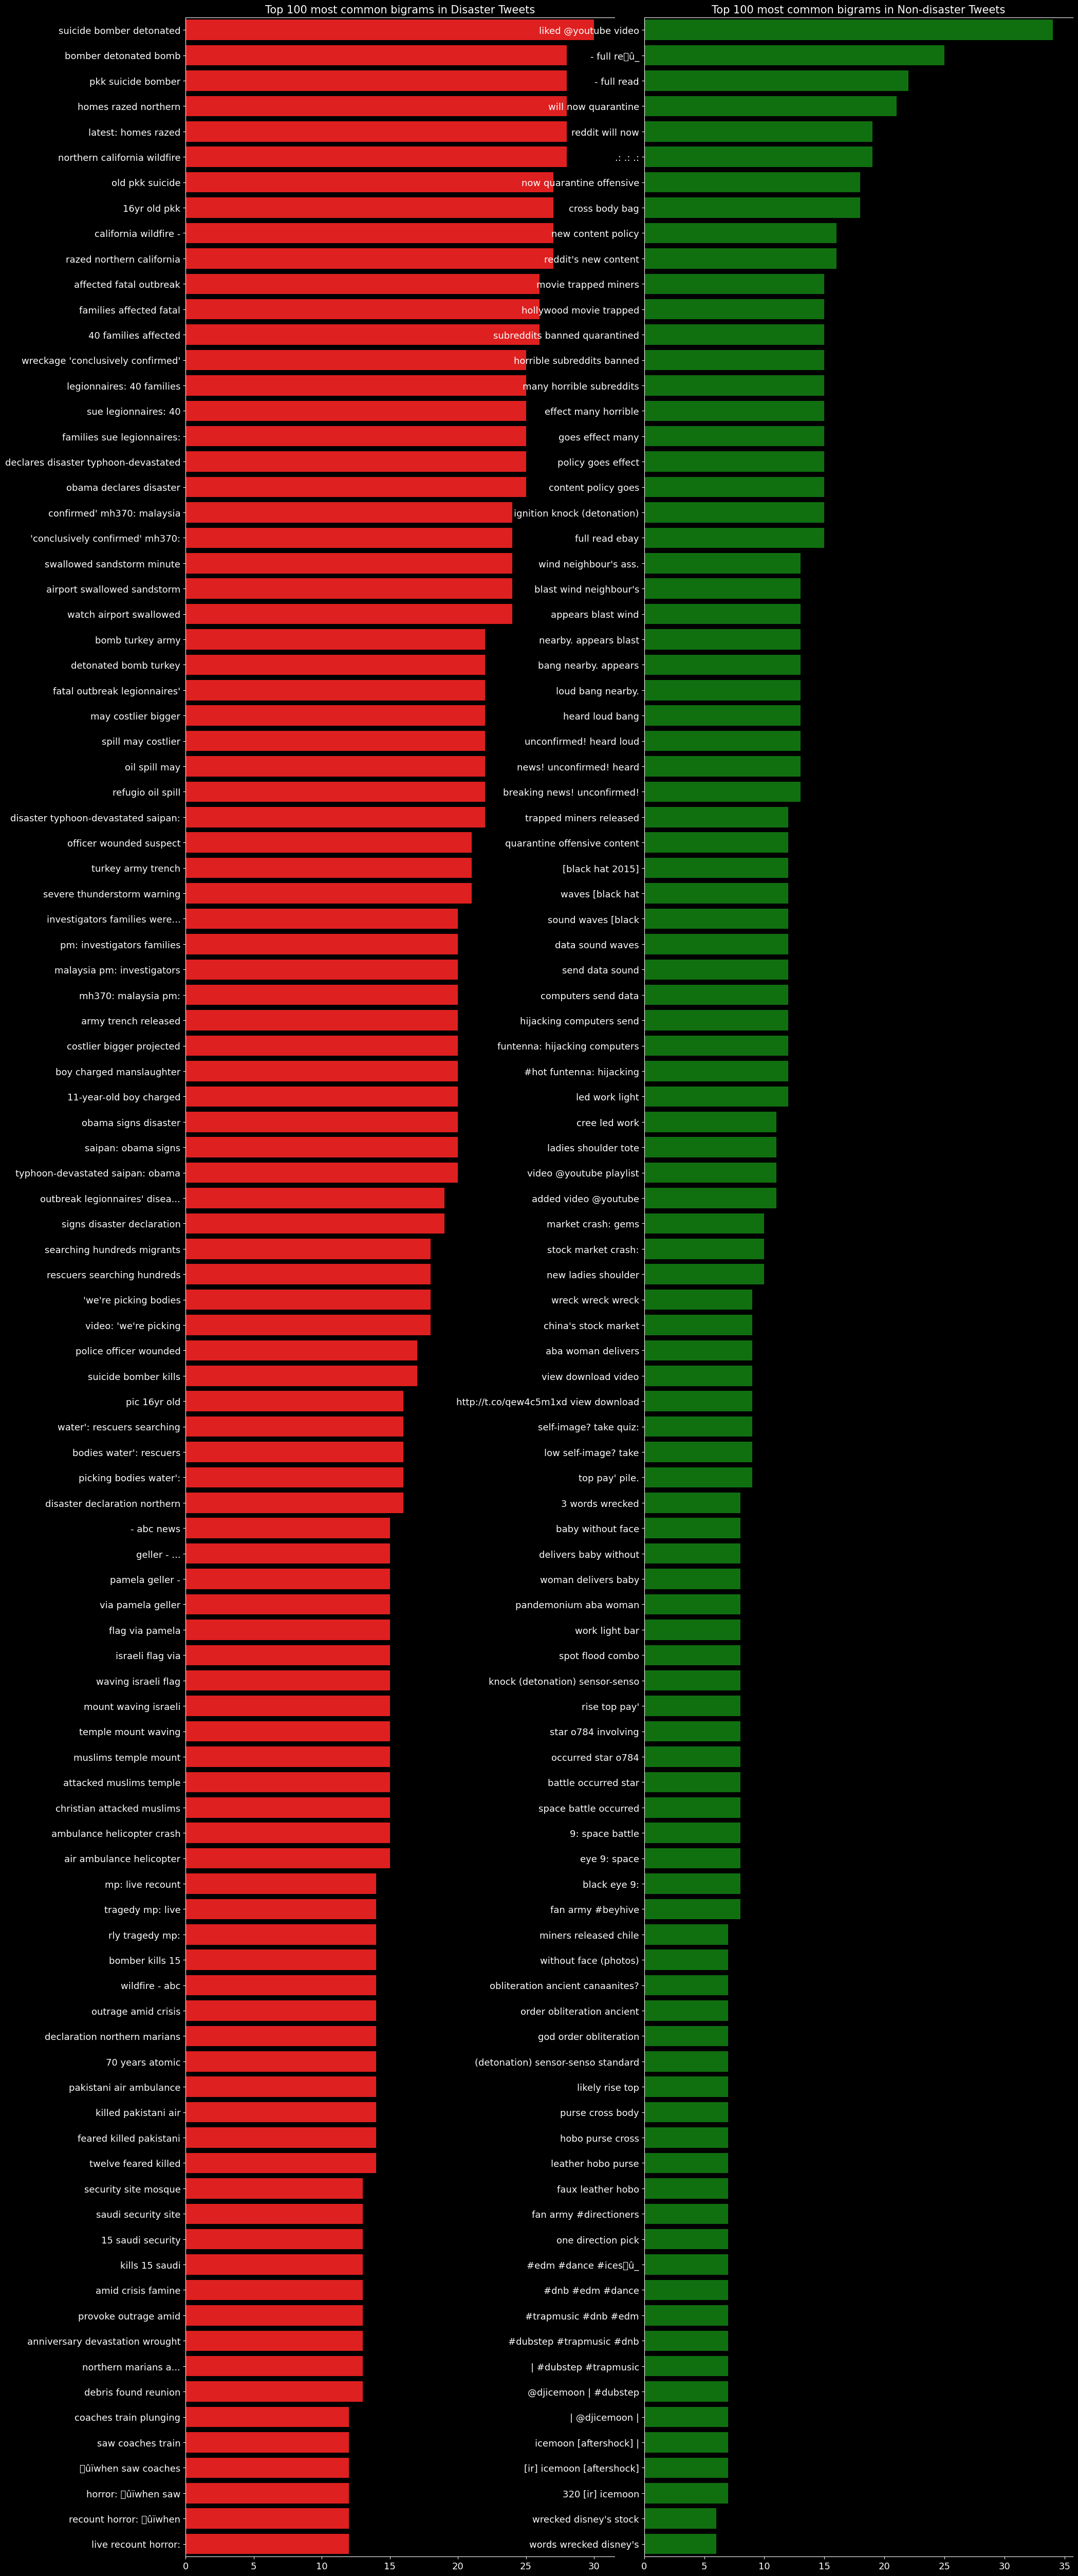

In [36]:
# Define the figure size and axis for plotting
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

# Plot the top 100 most common trigrams in disaster and non-disaster tweets
sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [37]:
# Dropping all the useless columns which we just created for the analysis.
# We will drop the following columns: 'word_count', 'unique_word_count', 'stop_word_count', 
#                                     'url_count', 'hashtag_count', 'mention_count', 'mean_word_length', 'char_count', 'punctuation_count'
for df in [tweets, tweets_test]:
	df.drop(columns=['word_count','unique_word_count','stop_word_count','url_count',
		  'mean_word_length','char_count','punctuation_count','hashtag_count','mention_count'],inplace=True)

In [38]:
# We are also dropping the target variable from the training dataset because we have already stored it in a variable (tweets_target)
tweets.drop(columns=['target'],inplace=True)

In [39]:
# Creating a new column in the dataset by combining all the text columns (keyword, location, text) into a single column, 
# So that we can make embeddings on it and make predictions
tweets['complete_text'] = tweets['keyword'] + ' ' + tweets['location'] + ' ' + tweets['text']
tweets_test['complete_text'] = tweets_test['keyword'] + ' ' + tweets_test['location'] + ' ' + tweets_test['text']

In [40]:
# Display the first 3 rows of the dataset after adding the new column complete_text
tweets.head(3)

,keyword,location,text,complete_text
0,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,nokeyword nolocation Our Deeds are the Reason ...
1,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,nokeyword nolocation Forest fire near La Ronge...
2,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,nokeyword nolocation All residents asked to 's...


# Data Preprocessing
   * All of the  data pre-processing steps are implemented as class which we have created in a main_function.py file.<br> We are importing this class a libray and call it's methods accordingly. Firstly we call get_embedding() method it will train the word2Vec model on training data and then save it into a folder and then we again call average_embed() method to get an average embedding of 256 dim vector of the the words which are present in the particular sentence.


### Embeddings

In [41]:
# Create an new instance text_clean of the class X_clean to clean the training data and create a Word2Vec model on the cleaned data.
# The method should take as input the training data and a boolen value train if it is a training data or not, 
# and return a Message when the trainnig is done.
text_clean = X_clean(train=True,training_list=tweets['complete_text'])

# # Call the get_embedding method to train the Word2Vec model
text_clean.get_embedding()

'Training Done'

In [42]:
# Create a new column in the dataset to store the average embeddings of the complete_text column in the dataset
for df in [tweets, tweets_test]:
    df['embeddings'] = df['complete_text'].apply(lambda x: X_clean(text = x).average_embed())

In [43]:
tweets.head()

,keyword,location,text,complete_text,embeddings
0,nokeyword,nolocation,Our Deeds are the Reason of this #earthquake M...,nokeyword nolocation Our Deeds are the Reason ...,"[0.05064786266949442, -0.08147592325177458, 0...."
1,nokeyword,nolocation,Forest fire near La Ronge Sask. Canada,nokeyword nolocation Forest fire near La Ronge...,"[0.05995594756677747, -0.10028368094936013, 0...."
2,nokeyword,nolocation,All residents asked to 'shelter in place' are ...,nokeyword nolocation All residents asked to 's...,"[0.03657772907366355, -0.06252764227489631, 0...."
3,nokeyword,nolocation,"13,000 people receive #wildfires evacuation or...","nokeyword nolocation 13,000 people receive #wi...","[0.05427243224241667, -0.09265073430207041, 0...."
4,nokeyword,nolocation,Just got sent this photo from Ruby #Alaska as ...,nokeyword nolocation Just got sent this photo ...,"[0.04774065349589695, -0.08051595396616242, 0...."


In [44]:
# Showing how embeddings looks like for a single tweet
d= 'body%20bagging Cloud 9 Mopheme and Bigstar Johnson are a problem in this game body bagging niggas #VuzuHustle'
X_clean(text = d,train=False).average_embed()

array([ 3.13997708e-02, -5.45233400e-02,  1.40885702e-02,  1.37545154e-01,
        1.87869960e-01, -4.63537965e-02,  8.15854656e-02,  9.26267420e-02,
        5.51025141e-02,  5.47657270e-02, -2.51103910e-03, -1.13303319e-01,
       -6.56520665e-02, -2.20159353e-01,  6.74665335e-02,  1.70434958e-01,
       -4.21814241e-02,  1.38697592e-01, -1.32042749e-01,  1.35838600e-01,
        1.13650793e-01,  1.08716277e-01,  7.61800663e-03, -1.04950845e-01,
       -2.03150643e-01,  7.55953806e-02,  1.36435314e-02,  6.70150652e-02,
       -1.15509445e-01,  2.07935455e-02, -2.42287647e-02,  3.67483345e-02,
       -8.83218462e-02,  1.00782506e-02,  9.27816366e-03,  1.46429777e-01,
        1.11400087e-01, -1.55412810e-01,  1.19058984e-02, -7.82138627e-02,
       -2.41473478e-01,  9.55016557e-02,  2.20642258e-02, -7.15892619e-02,
        1.56311574e-01, -8.19013975e-02,  4.81255976e-02, -7.68495132e-02,
        3.10533990e-02, -6.86998454e-02, -5.84454091e-02, -5.09361281e-02,
       -6.51168107e-02,  

In [45]:
tweets["embeddings"].head(5)

0    [0.05064786266949442, -0.08147592325177458, 0....
1    [0.05995594756677747, -0.10028368094936013, 0....
2    [0.03657772907366355, -0.06252764227489631, 0....
3    [0.05427243224241667, -0.09265073430207041, 0....
4    [0.04774065349589695, -0.08051595396616242, 0....
Name: embeddings, dtype: object

In [46]:
tweets_test['embeddings'].head(5)

0    [0.04804320714902133, -0.0772997677559033, 0.0...
1    [0.044002423714846375, -0.07291706688702107, 0...
2    [0.047824157486585056, -0.07853317971933972, 0...
3    [0.03572501601385219, -0.05798704316839576, 0....
4    [0.04183512972667813, -0.07163359550759196, 0....
Name: embeddings, dtype: object

# How classification and semi-supervised algorithms work

Classification Algorithms And  Semi-Supervised Learning Algorithms
----------------------
Classification algorithms aim to categorize the data into the categories which are already known to us. For example- spam and non-spam. whereas in semi-supervised learning, we have unlabelled data and we try to create a model to find the patterns in that unlabelled data and assign the pseudo-labels to it so that we can use it in our future prediction. It also leverage to improve the model performance. It is commonly used in NLP, Image classification.

# Semi-Supervised Learing

### Using K-Means for Semi Supervised Learing Part of the Assignment

In [47]:
# Before moving forward to semi -supervised learning , here are something to discuss.
# Our dataset is completely labelled. So, to apply this part we have  two options: 
# 1) We took some  random samples form training dataest and make them unlabelled 
# 2) We took some samples from  testing set which is already unlabelled and perform the semi-supervised part on it. 
# In our case we will go with the first option  because it's easier for us .

# But before doing this we first drop all the other useless columns  that do not contribute to prediction and  keep only those which are necessary :
# We are going to drop 'keyword', 'location', 'text' column  from our dataframe and keep only 'complete_text' and 'embeddings 
# because embedding is something that is used to perform predictions and 'complete_text' to refer it  back to original textual data.

In [48]:
# Dropping the columns from the dataset
for df in [tweets, tweets_test]:
    df.drop(columns=['keyword', 'location', 'text'], inplace=True)


In [49]:
tweets.head()

,complete_text,embeddings
0,nokeyword nolocation Our Deeds are the Reason ...,"[0.05064786266949442, -0.08147592325177458, 0...."
1,nokeyword nolocation Forest fire near La Ronge...,"[0.05995594756677747, -0.10028368094936013, 0...."
2,nokeyword nolocation All residents asked to 's...,"[0.03657772907366355, -0.06252764227489631, 0...."
3,"nokeyword nolocation 13,000 people receive #wi...","[0.05427243224241667, -0.09265073430207041, 0...."
4,nokeyword nolocation Just got sent this photo ...,"[0.04774065349589695, -0.08051595396616242, 0...."


In [63]:
# Concate it again for temprory use to perform semi-supervised learning on 10 percent on the complete training dataset
tweets_semi = pd.concat([tweets, tweets_target], axis=1)

In [75]:
# Now get back to Semi-Supervised Learning

# Step 1: We will take some samples from the testing dataset

# We are taking 10% of the training dataset for semi-supervised learning
tweets_for_semi_supervised = tweets_semi.sample(frac=0.1, random_state=42)

In [76]:
tweets_for_semi_supervised.shape

(761, 3)

In [77]:
print(tweets_for_semi_supervised['complete_text'][1:2])

2227    deluge nolocation The f$&amp;@ing things I do ...
Name: complete_text, dtype: object


In [78]:
# As we are going to use only 'embeddings' columns for semi-supervised learning, we will convert it into a DataFrame
# because it is a vector of 256 Dim's
tweets_for_semi_supervised_embeddings = pd.DataFrame(tweets_for_semi_supervised['embeddings'].values.tolist())

In [79]:
tweets_for_semi_supervised_embeddings.shape

(761, 256)

In [80]:
tweets_for_semi_supervised_embeddings.tail()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
756,0.062666,-0.109228,0.028879,0.260779,0.354626,-0.088125,0.160124,0.173132,0.104875,0.102965,...,0.229732,0.044925,-0.401238,-0.017848,-0.103836,0.153784,-0.058479,-0.201139,-0.332449,-0.054376
757,0.039467,-0.067375,0.018519,0.171148,0.233624,-0.057326,0.100524,0.117364,0.066358,0.070892,...,0.152903,0.035145,-0.262065,-0.011111,-0.074926,0.097620,-0.027685,-0.133394,-0.220342,-0.030304
758,0.032533,-0.056776,0.013831,0.132740,0.178077,-0.045757,0.080111,0.087642,0.051389,0.051322,...,0.115488,0.023556,-0.203956,-0.010031,-0.053229,0.077052,-0.026590,-0.101587,-0.166717,-0.028678
759,0.047445,-0.080108,0.018767,0.194632,0.257146,-0.065686,0.115848,0.128735,0.073467,0.072620,...,0.169343,0.039229,-0.289837,-0.013834,-0.079996,0.113115,-0.035873,-0.145715,-0.240739,-0.037671
760,0.034580,-0.085529,0.010038,0.167213,0.231301,-0.061801,0.107832,0.113857,0.063180,0.071838,...,0.159444,0.052304,-0.256329,-0.019035,-0.075838,0.108636,-0.027554,-0.128677,-0.235286,-0.019244


In [81]:
tweets_for_semi_supervised_embeddings.index

RangeIndex(start=0, stop=761, step=1)

In [82]:
from sklearn.cluster import KMeans
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tweets_for_semi_supervised_embeddings)

KMeans(n_clusters=2, random_state=42)

In [83]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 

In [91]:
main_pred = list(tweets_for_semi_supervised['target'])
Correct = 0
wrong = 0
for i in range(len(cluster_labels)):
	print(main_pred[i],"==",cluster_labels[i])
	if main_pred[i] == cluster_labels[i]:
		Correct+=1
	else:
		wrong += 1

print("Number of correctly classified instances: ",Correct)
print("Number of incorrectly classified instances: ",wrong)

# Compute the clustering accuracy (if the clustering is correct)
clustering_accuracy = (Correct/len(cluster_labels)) * 100
print("Clustering accuracy: ", clustering_accuracy)

# print()

1 == 1
0 == 1
1 == 1
0 == 1
0 == 1
0 == 1
1 == 0
1 == 0
0 == 0
1 == 1
1 == 1
0 == 1
0 == 1
0 == 1
0 == 0
0 == 1
0 == 0
0 == 0
1 == 1
0 == 1
1 == 1
0 == 0
0 == 0
0 == 0
1 == 0
0 == 1
1 == 1
1 == 0
1 == 0
0 == 0
0 == 1
0 == 1
0 == 0
1 == 1
1 == 0
0 == 0
1 == 1
0 == 0
0 == 0
0 == 0
0 == 0
1 == 1
0 == 1
1 == 1
0 == 0
1 == 1
1 == 1
0 == 0
1 == 0
1 == 1
0 == 0
1 == 1
1 == 1
0 == 0
0 == 1
0 == 0
1 == 0
0 == 0
1 == 1
0 == 0
0 == 1
0 == 0
1 == 1
0 == 0
0 == 1
1 == 0
1 == 1
0 == 0
1 == 1
0 == 0
0 == 1
0 == 1
0 == 1
0 == 0
0 == 0
0 == 0
0 == 1
1 == 1
0 == 0
1 == 0
0 == 0
0 == 1
1 == 0
1 == 0
0 == 0
1 == 0
1 == 0
0 == 1
1 == 0
0 == 1
1 == 0
0 == 0
0 == 0
0 == 0
0 == 0
1 == 1
0 == 1
0 == 1
1 == 1
1 == 1
0 == 1
0 == 0
0 == 0
0 == 1
0 == 0
0 == 1
0 == 0
1 == 1
1 == 0
0 == 1
1 == 0
1 == 0
1 == 1
1 == 0
0 == 1
1 == 0
0 == 1
0 == 0
0 == 0
0 == 0
1 == 0
0 == 1
0 == 0
1 == 0
1 == 1
0 == 1
0 == 0
1 == 1
1 == 0
0 == 0
1 == 0
0 == 1
1 == 0
0 == 0
0 == 1
1 == 0
0 == 1
0 == 0
0 == 1
1 == 1
0 == 0
0 == 1
1 == 1

Now, We are done with K-Means clustering part and got lablels for our `761` rows now we are going to do our classification part. But before doing that we have to convert the `tweets['embeddings']` into a dataframe as it is a vactor of 256 Dim's

In [93]:
tweets_Embeddings = pd.DataFrame(tweets['embeddings'].values.tolist())
tweets_Embeddings.shape

(7613, 256)

In [94]:
tweets_Embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.050648,-0.081476,0.021225,0.203127,0.273096,-0.071054,0.121379,0.136408,0.079827,0.075212,...,0.177885,0.037029,-0.310195,-0.011656,-0.084220,0.116931,-0.040990,-0.155767,-0.252474,-0.044018
1,0.059956,-0.100284,0.023355,0.241981,0.320658,-0.085077,0.143262,0.161799,0.094753,0.090784,...,0.210406,0.043825,-0.363564,-0.016783,-0.096499,0.139424,-0.047902,-0.181991,-0.298047,-0.051429
2,0.036578,-0.062528,0.016251,0.151602,0.202501,-0.053687,0.090487,0.100824,0.059427,0.056654,...,0.132907,0.027502,-0.228923,-0.010528,-0.062490,0.088270,-0.030197,-0.115424,-0.189035,-0.031063
3,0.054272,-0.092651,0.024625,0.233690,0.303375,-0.079838,0.139259,0.153434,0.086906,0.083184,...,0.199558,0.037595,-0.343152,-0.013731,-0.095774,0.132856,-0.045215,-0.172255,-0.284632,-0.049232
4,0.047741,-0.080516,0.020935,0.195825,0.259563,-0.067575,0.117193,0.129745,0.073243,0.071971,...,0.169498,0.035548,-0.295017,-0.012384,-0.080585,0.113727,-0.039082,-0.148180,-0.244721,-0.040763


In [95]:
tweets_Embeddings.tail()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
7608,0.041990,-0.075185,0.019476,0.188327,0.246008,-0.063926,0.112489,0.126206,0.070454,0.070250,...,0.160609,0.032289,-0.279939,-0.012327,-0.075278,0.103687,-0.038323,-0.140455,-0.228130,-0.037537
7609,0.052268,-0.091487,0.021138,0.226827,0.294883,-0.078412,0.136141,0.148980,0.085547,0.082013,...,0.195189,0.038998,-0.333903,-0.015297,-0.091022,0.129905,-0.043704,-0.168901,-0.275478,-0.045371
7610,0.032993,-0.053921,0.014595,0.131018,0.174930,-0.045301,0.079744,0.087922,0.049947,0.048674,...,0.114499,0.024962,-0.199059,-0.008118,-0.054110,0.074559,-0.025219,-0.100379,-0.165148,-0.027934
7611,0.037386,-0.062681,0.015557,0.152202,0.202543,-0.053195,0.091479,0.101102,0.059358,0.058969,...,0.132898,0.027602,-0.229959,-0.009684,-0.062926,0.088052,-0.031766,-0.114067,-0.188431,-0.030360
7612,0.051674,-0.094858,0.020625,0.248045,0.314899,-0.086588,0.149829,0.160955,0.090968,0.084678,...,0.210351,0.037972,-0.352825,-0.012891,-0.099788,0.134004,-0.047297,-0.179307,-0.293877,-0.049356


As we see we have now 256 columns in the `tweets_Embedding` dataframe, which we get from our Word2Vec model.

## Model Trainings


In [102]:
# Library to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(tweets_Embeddings, tweets_target.tolist(), test_size=0.2, random_state=42)

#### Machine Learning Model Libraries

* **We are using the concept of Stacking to get the best result. It is a technique in which we use different model together and<br>utilize them according to the weights for producing the output with a new model(final model)**

Example: <br>
![Image](stacking.png)


reference - [www.geeksforgeeks.](https://www.geeksforgeeks.org/stacking-in-machine-learning/)

In [97]:
# Importing all the important model libraries for the project
# We are using the stacking in this procject to get the best results

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Bagging
from sklearn.ensemble import BaggingClassifier
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Extra Tree
from sklearn.tree import ExtraTreeClassifier
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier

# Stacking Classifier
from sklearn.ensemble import StackingClassifier

# XG-Boost
from xgboost import XGBClassifier
# Cat-Boost
from catboost import CatBoostClassifier

In [98]:
# Creating a list of all the models which we are going to use in the project for stacking
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))

In [99]:
estimators

[('AdaBoostClassifier', AdaBoostClassifier(random_state=13)),
 ('Bagging Classifier', BaggingClassifier(random_state=13)),
 ('Bernoulli NB', BernoulliNB()),
 ('Decision Tree Classifier', DecisionTreeClassifier(random_state=13)),
 ('Extra Tree Classifier', ExtraTreeClassifier(random_state=13)),
 ('Gaussian NB', GaussianNB()),
 ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13)),
 ('KNN', KNeighborsClassifier()),
 ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)),
 ('RandomForest',
  RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=170,
                         random_state=13)),
 ('Ridge Classifier', RidgeClassifier(random_state=13)),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_ty

In [100]:
# Our Final Model, which we are going to use for final classification
XGB = XGBClassifier(random_state=13)

In [103]:
# Creating a Stacking Classifier instance with all the models and the final model
# and fit the model on the training data
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_val)

print(f"\nStacking classifier training Accuracy: {SC.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(X_val, y_val):0.2f}")


Stacking classifier training Accuracy: 0.84
Stacking classifier test Accuracy: 0.70


## Results of Implementation

In [112]:
# Importing all the necessary libraries for the evaluation of the model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

In [105]:
# Classification Report
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       874
           1       0.66      0.62      0.64       649

    accuracy                           0.70      1523
   macro avg       0.70      0.69      0.69      1523
weighted avg       0.70      0.70      0.70      1523




 Model Name --> StackingClassifier 

 * F1 score (weighted) --> 0.6412698412698413
 * ROC AUC SCORE --> 0.6928270213283595
 * Precison --> 0.6612111292962357
 * Recall --> 0.6224961479198767
 * Accuracy --> 0.7032173342087984
 * Confusion Matrix --> 
 [[667 207]
 [245 404]]
   - FALSE POSITIVES --> 207
   -False Negatives --> 245
   -True POSITIVES --> 404
   -True Negatives --> 667


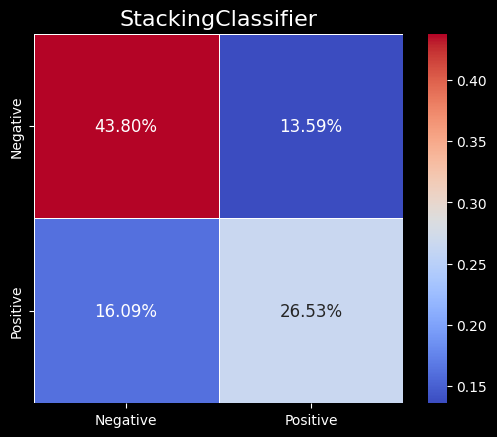

In [109]:
# Evaluation of the model
# Calculating the F1 score, ROC AUC score, Precision, Recall, Accuracy, and Confusion Matrix
f1_sc = f1_score(y_val, y_pred)
roc_auc_scr = roc_auc_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
confusion_score = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = confusion_score.ravel()

# Printing the results
print('\n Model Name -->',SC.__class__.__name__,'\n')
print('=============================================')
print(' * F1 score (weighted) -->',f1_sc)
print(' * ROC AUC SCORE -->',roc_auc_scr)
print(' * Precison -->',precision)
print(' * Recall -->',recall)
print(' * Accuracy -->',acc)
print(' * Confusion Matrix --> \n',confusion_score)
print('   - FALSE POSITIVES -->',fp)
print('   -False Negatives -->',fn)
print('   -True POSITIVES -->',tp)
print('   -True Negatives -->',tn)
print('=============================================')
# Create the heatmap with annotation and title
sns.heatmap(confusion_score/np.sum(confusion_score), annot=True, cmap='coolwarm', fmt='.2%', linewidths=.5, cbar=True, annot_kws={'fontsize':12}, 
	xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], square=True)

# Add title to the heatmap
plt.title(SC.__class__.__name__, fontsize=16)
plt.show()

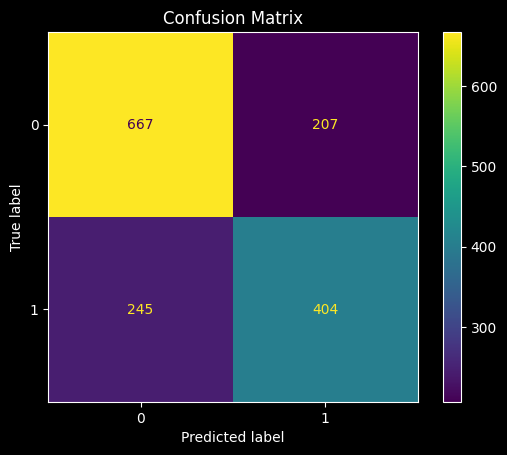

In [114]:
# Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(SC, X_val, y_val)
plt.title("Confusion Matrix")
plt.show()

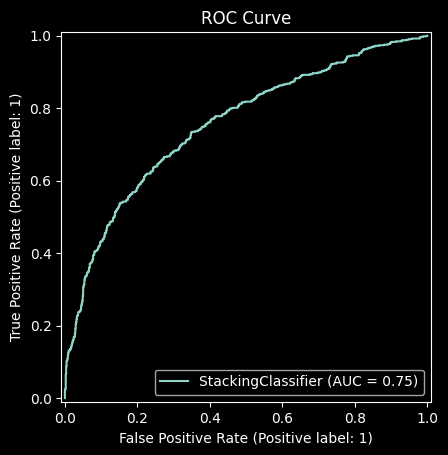

In [116]:
# RoC curve graph
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator(SC, X_val, y_val)
plt.title("ROC Curve")
plt.show()

# Conclusion

# Utilization of Analysis Results for Twitter(X) Disaster Classification

##### The utilization of the results from this analysis can be used in several ways, it impact the business and operational areas - 

## Real-Time Disaster Monitoring:
   * This project can provide  real-time feed of disaster which are occuring worldwide
   * This can help agencies to track the emergencies and response rapidly
## Enhanced Situational Awareness:
   * It provides information about ongoing disasters, their severity, location etc by which businesses can gain valuable insights into going on events.
## Improved Decision-Making:
   * Insights from this  analysis will be used by stakeholders to  make better decisions.
   * Data can be used to priotize the actions based of various factors
## Business Continuity Planning:
   * Companies can use this analysis to understand the potential risks that may occur to their supply chain or operations 
   * Help businesses to plan accordingly in case of any natural or man made calamities
## Humanitarian Aid and Relief Efforts:
   * Can assist organizations in identifying areas that require immediate attention and allow the NGO's to focus on those areas.
   * This can help them to plan and exicute the relif efforts more efficently